# Predicting Impact Of Climate Change By Analyzing Climate Data

In [1]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file 
df_test = pd.read_csv('conventional_weather_stations_inmet_brazil_1961_2019.csv' , sep=";")

df_test.head(5)

,Estacao,Data,Hora,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,PressaoAtmEstacao,PressaoAtmMar,DirecaoVento,VelocidadeVento,Insolacao,Nebulosidade,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 19
0,82024,01/01/1961,0,NaN,NaN,NaN,32.3,NaN,NaN,NaN,NaN,NaN,NaN,4.4,NaN,NaN,26.56,82.5,3.000000,NaN
1,82024,01/01/1961,1200,NaN,26.0,23.9,NaN,22.9,83.0,994.2,NaN,5.0,5.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
2,82024,01/01/1961,1800,NaN,32.3,27.0,NaN,NaN,65.0,991.6,NaN,5.0,3.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN
3,82024,02/01/1961,0,NaN,25.8,24.6,33.2,NaN,91.0,991.9,NaN,9.0,1.0,10.0,7.0,NaN,28.06,77.5,5.666667,NaN
4,82024,02/01/1961,1200,16.0,26.8,24.0,NaN,23.7,78.0,995.0,NaN,5.0,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Taking only the necessary Attributes
# #choosing the necessary attributes to perform the required task on it 

df = df_test[['Data', 'Precipitacao', 'TempMaxima', 'TempMinima', 'UmidadeRelativa',
              'DirecaoVento', 'VelocidadeVento', 'Nebulosidade']]
df.head(10)

,Data,Precipitacao,TempMaxima,TempMinima,UmidadeRelativa,DirecaoVento,VelocidadeVento,Nebulosidade
0,01/01/1961,NaN,32.3,NaN,NaN,NaN,NaN,NaN
1,01/01/1961,NaN,NaN,22.9,83.0,5.0,5.0,8.0
2,01/01/1961,NaN,NaN,NaN,65.0,5.0,3.0,9.0
3,02/01/1961,NaN,33.2,NaN,91.0,9.0,1.0,7.0
4,02/01/1961,16.0,NaN,23.7,78.0,5.0,7.0,7.0
5,02/01/1961,NaN,NaN,NaN,64.0,5.0,7.0,8.0
6,03/01/1961,NaN,32.9,NaN,84.0,5.0,3.0,5.0
7,03/01/1961,0.0,NaN,23.3,76.0,9.0,7.0,7.0
8,03/01/1961,NaN,NaN,NaN,57.0,5.0,9.0,8.0
9,04/01/1961,NaN,30.4,NaN,75.0,5.0,3.0,5.0


choosing the necessary attributes to perform the required task on it

In [4]:
#Renaming Columns 
#renaming the columns such that it is easy for us to understand the data which are present in the columns for further work

df.rename(columns = {
      'Data':'Date',
      'Precipitacao':'Precipitation',
      'TempMaxima':'Maximum_Temperature',
      'TempMinima':'Minimum_Temperature', 
      'UmidadeRelativa':'Relative_humidity', 
      'DirecaoVento':'Wind_direction', 
      'VelocidadeVento':'Wind_speed',
      'Nebulosidade':'Cloudiness'
       }, inplace = True)
data = df.copy()
df.head(10)

,Date,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness
0,01/01/1961,NaN,32.3,NaN,NaN,NaN,NaN,NaN
1,01/01/1961,NaN,NaN,22.9,83.0,5.0,5.0,8.0
2,01/01/1961,NaN,NaN,NaN,65.0,5.0,3.0,9.0
3,02/01/1961,NaN,33.2,NaN,91.0,9.0,1.0,7.0
4,02/01/1961,16.0,NaN,23.7,78.0,5.0,7.0,7.0
5,02/01/1961,NaN,NaN,NaN,64.0,5.0,7.0,8.0
6,03/01/1961,NaN,32.9,NaN,84.0,5.0,3.0,5.0
7,03/01/1961,0.0,NaN,23.3,76.0,9.0,7.0,7.0
8,03/01/1961,NaN,NaN,NaN,57.0,5.0,9.0,8.0
9,04/01/1961,NaN,30.4,NaN,75.0,5.0,3.0,5.0


Renaming the columns such that it is easy for us to understand the data which are present in the columns for further work

In [5]:
#Understanding information about the data
#presenting the information regarding the data such that required task can be performed on it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12251335 entries, 0 to 12251334
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Date                 object 
 1   Precipitation        float64
 2   Maximum_Temperature  float64
 3   Minimum_Temperature  float64
 4   Relative_humidity    float64
 5   Wind_direction       float64
 6   Wind_speed           float64
 7   Cloudiness           float64
dtypes: float64(7), object(1)
memory usage: 747.8+ MB


presenting the information regarding the data such that required task can be performed on it

In [6]:
#Checking for missing values

print(df.isnull().sum())

Date                         0
Precipitation          8130580
Maximum_Temperature    8300413
Minimum_Temperature    8292199
Relative_humidity       846548
Wind_direction         1221386
Wind_speed             1019529
Cloudiness              433425
dtype: int64


checking whether there are missing values to understand about noisy data

In [7]:
#checking missing columns in Precipitation

df[df["Precipitation"].isnull()]

,Date,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness
0,01/01/1961,NaN,32.3,NaN,NaN,NaN,NaN,NaN
1,01/01/1961,NaN,NaN,22.9,83.0,5.0,5.00000,8.00
2,01/01/1961,NaN,NaN,NaN,65.0,5.0,3.00000,9.00
3,02/01/1961,NaN,33.2,NaN,91.0,9.0,1.00000,7.00
5,02/01/1961,NaN,NaN,NaN,64.0,5.0,7.00000,8.00
...,...,...,...,...,...,...,...,...
12251328,29/12/2019,NaN,NaN,NaN,43.0,14.0,1.02888,6.25
12251329,30/12/2019,NaN,32.1,NaN,60.0,14.0,1.02888,0.00
12251331,30/12/2019,NaN,NaN,NaN,46.0,36.0,1.02888,7.50
12251332,31/12/2019,NaN,31.6,NaN,55.0,27.0,1.02888,0.00


In [8]:
# filling the missing values with their mean
#
meanVal1 = df['Precipitation'].mean()
df['Precipitation'].fillna(value=meanVal1, inplace=True)

meanVal2 = df['Maximum_Temperature'].mean()
df['Maximum_Temperature'].fillna(value=meanVal2, inplace=True)

meanVal3 = df['Minimum_Temperature'].mean()
df['Minimum_Temperature'].fillna(value=meanVal3, inplace=True)

meanVal4 = df['Relative_humidity'].mean()
df['Relative_humidity'].fillna(value=meanVal4, inplace=True)

meanVal5 = df['Wind_direction'].mean()
df['Wind_direction'].fillna(value=meanVal5, inplace=True)

meanVal6 = df['Wind_speed'].mean()
df['Wind_speed'].fillna(value=meanVal6, inplace=True)

meanVal7 = df['Cloudiness'].mean()
df['Cloudiness'].fillna(value=meanVal7, inplace=True)


There are certain methods which can be used to replace missing values we here is using the mean method such that the computation is easier

In [9]:
# checking for missing values

df.isnull().sum()

Date                   0
Precipitation          0
Maximum_Temperature    0
Minimum_Temperature    0
Relative_humidity      0
Wind_direction         0
Wind_speed             0
Cloudiness             0
dtype: int64

In [10]:
df.head(10)

,Date,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness
0,01/01/1961,4.027972,32.300000,18.927569,72.21245,12.74881,1.959493,5.309515
1,01/01/1961,4.027972,29.725229,22.900000,83.00000,5.00000,5.000000,8.000000
2,01/01/1961,4.027972,29.725229,18.927569,65.00000,5.00000,3.000000,9.000000
3,02/01/1961,4.027972,33.200000,18.927569,91.00000,9.00000,1.000000,7.000000
4,02/01/1961,16.000000,29.725229,23.700000,78.00000,5.00000,7.000000,7.000000
5,02/01/1961,4.027972,29.725229,18.927569,64.00000,5.00000,7.000000,8.000000
6,03/01/1961,4.027972,32.900000,18.927569,84.00000,5.00000,3.000000,5.000000
7,03/01/1961,0.000000,29.725229,23.300000,76.00000,9.00000,7.000000,7.000000
8,03/01/1961,4.027972,29.725229,18.927569,57.00000,5.00000,9.000000,8.000000
9,04/01/1961,4.027972,30.400000,18.927569,75.00000,5.00000,3.000000,5.000000


In [11]:
#Checking the number of rows and columns 

df.shape

(12251335, 8)

In [12]:
#Printing the last 5 rows 

df.tail()

,Date,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness
12251330,30/12/2019,0.000000,29.725229,21.100000,66.0,5.0,1.02888,7.50
12251331,30/12/2019,4.027972,29.725229,18.927569,46.0,36.0,1.02888,7.50
12251332,31/12/2019,4.027972,31.600000,18.927569,55.0,27.0,1.02888,0.00
12251333,31/12/2019,0.000000,29.725229,21.300000,54.0,0.0,0.00000,8.75
12251334,31/12/2019,4.027972,29.725229,18.927569,43.0,0.0,0.00000,8.75


In [13]:
df['Date']=pd.to_datetime(df['Date'])
df.head(5)

,Date,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness
0,1961-01-01,4.027972,32.300000,18.927569,72.21245,12.74881,1.959493,5.309515
1,1961-01-01,4.027972,29.725229,22.900000,83.00000,5.00000,5.000000,8.000000
2,1961-01-01,4.027972,29.725229,18.927569,65.00000,5.00000,3.000000,9.000000
3,1961-02-01,4.027972,33.200000,18.927569,91.00000,9.00000,1.000000,7.000000
4,1961-02-01,16.000000,29.725229,23.700000,78.00000,5.00000,7.000000,7.000000


In [14]:
#Descriptive Statistics
# 

df.describe()

,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness
count,1.225134e+07,1.225134e+07,1.225134e+07,1.225134e+07,1.225134e+07,1.225134e+07,1.225134e+07
mean,4.027972e+00,2.972523e+01,1.892757e+01,7.221245e+01,1.274881e+01,1.959493e+00,5.309515e+00
std,6.321910e+00,2.592241e+00,2.528762e+00,1.746268e+01,1.053072e+01,1.716387e+00,3.596348e+00
min,0.000000e+00,-2.000000e+00,-9.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,1.600000e+00,2.972523e+01,1.892757e+01,6.100000e+01,5.000000e+00,1.000000e+00,2.000000e+00
50%,4.027972e+00,2.972523e+01,1.892757e+01,7.300000e+01,1.274881e+01,1.959493e+00,6.000000e+00
75%,4.027972e+00,2.972523e+01,1.892757e+01,8.600000e+01,1.800000e+01,3.000000e+00,8.750000e+00
max,3.779000e+02,4.470000e+01,3.650000e+01,1.000000e+02,9.900000e+01,2.417868e+01,9.900000e+01


Describing the required columns

In [15]:
#Normalization Using Min Max Scaling
#

x = df.iloc[:,1:7]
global_min = x.min()
global_max = x.max()
df.iloc[:,1:7] = (x-global_min) / (global_max - global_min)


df.describe()

,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness
count,1.225134e+07,1.225134e+07,1.225134e+07,1.225134e+07,1.225134e+07,1.225134e+07,1.225134e+07
mean,1.065883e-02,6.793411e-01,6.137927e-01,6.979614e-01,1.287759e-01,8.104219e-02,5.309515e+00
std,1.672906e-02,5.550837e-02,5.557719e-02,1.898117e-01,1.063709e-01,7.098763e-02,3.596348e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,4.233924e-03,6.793411e-01,6.137927e-01,5.760870e-01,5.050505e-02,4.135875e-02,2.000000e+00
50%,1.065883e-02,6.793411e-01,6.137927e-01,7.065217e-01,1.287759e-01,8.104219e-02,6.000000e+00
75%,1.065883e-02,6.793411e-01,6.137927e-01,8.478261e-01,1.818182e-01,1.240763e-01,8.750000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e+01


The process of transforming the columns in a dataset to the same scale

In [16]:
# Getting year,month,day and day name 

df['Year']=df["Date"].dt.year
df['Month']=df["Date"].dt.month
df['Day']=df["Date"].dt.day
df['Day Name']=df["Date"].dt.day_name()
df.head(10)

,Date,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness,Year,Month,Day,Day Name
0,1961-01-01,0.010659,0.734475,0.613793,0.697961,0.128776,0.081042,5.309515,1961,1,1,Sunday
1,1961-01-01,0.010659,0.679341,0.701099,0.815217,0.050505,0.206794,8.000000,1961,1,1,Sunday
2,1961-01-01,0.010659,0.679341,0.613793,0.619565,0.050505,0.124076,9.000000,1961,1,1,Sunday
3,1961-02-01,0.010659,0.753747,0.613793,0.902174,0.090909,0.041359,7.000000,1961,2,1,Wednesday
4,1961-02-01,0.042339,0.679341,0.718681,0.760870,0.050505,0.289511,7.000000,1961,2,1,Wednesday
5,1961-02-01,0.010659,0.679341,0.613793,0.608696,0.050505,0.289511,8.000000,1961,2,1,Wednesday
6,1961-03-01,0.010659,0.747323,0.613793,0.826087,0.050505,0.124076,5.000000,1961,3,1,Wednesday
7,1961-03-01,0.000000,0.679341,0.709890,0.739130,0.090909,0.289511,7.000000,1961,3,1,Wednesday
8,1961-03-01,0.010659,0.679341,0.613793,0.532609,0.050505,0.372229,8.000000,1961,3,1,Wednesday
9,1961-04-01,0.010659,0.693790,0.613793,0.728261,0.050505,0.124076,5.000000,1961,4,1,Saturday


In [17]:
# Sorting the data in ascending order on the basis of date 

df.sort_values(by="Date",ascending=True,inplace=True)
df.head(10)


,Date,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness,Year,Month,Day,Day Name
0,1961-01-01,0.010659,0.734475,0.613793,0.697961,0.128776,0.081042,5.309515,1961,1,1,Sunday
4227197,1961-01-01,0.010659,0.679341,0.613793,0.293478,0.050505,0.041359,5.000000,1961,1,1,Sunday
4227196,1961-01-01,0.010659,0.679341,0.727473,0.489130,0.050505,0.082718,4.000000,1961,1,1,Sunday
4227195,1961-01-01,0.010659,0.824411,0.613793,0.697961,0.128776,0.081042,5.309515,1961,1,1,Sunday
3206034,1961-01-01,0.010659,0.608137,0.613793,0.697961,0.128776,0.081042,5.309515,1961,1,1,Sunday
3206035,1961-01-01,0.010659,0.679341,0.624176,0.782609,0.181818,0.082718,10.000000,1961,1,1,Sunday
3206036,1961-01-01,0.010659,0.679341,0.613793,0.521739,0.000000,0.000000,10.000000,1961,1,1,Sunday
7519668,1961-01-01,0.010659,0.725910,0.613793,0.697961,0.128776,0.081042,5.309515,1961,1,1,Sunday
7519669,1961-01-01,0.010659,0.679341,0.595604,0.771739,0.128776,0.000000,0.000000,1961,1,1,Sunday
7519670,1961-01-01,0.010659,0.679341,0.613793,0.597826,0.128776,0.124076,9.000000,1961,1,1,Sunday


In [18]:
df.tail(10)

,Date,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness,Year,Month,Day,Day Name
2421854,2019-12-31,0.010659,0.679341,0.613793,0.456522,0.128776,0.081042,5.00,2019,12,31,Tuesday
6253606,2019-12-31,0.010659,0.679341,0.613793,0.467391,0.090909,0.042553,5.00,2019,12,31,Tuesday
6253605,2019-12-31,0.000000,0.679341,0.690110,0.565217,0.050505,0.127660,7.50,2019,12,31,Tuesday
6253604,2019-12-31,0.010659,0.764454,0.613793,0.673913,0.000000,0.000000,0.00,2019,12,31,Tuesday
6209680,2019-12-31,0.010659,0.679341,0.613793,0.608696,0.232323,0.085106,10.00,2019,12,31,Tuesday
6209679,2019-12-31,0.000000,0.679341,0.661538,0.706522,0.232323,0.106383,6.25,2019,12,31,Tuesday
6209678,2019-12-31,0.010659,0.732334,0.613793,0.673913,0.000000,0.000000,0.00,2019,12,31,Tuesday
6166564,2019-12-31,0.010659,0.679341,0.613793,0.478261,0.323232,0.085106,10.00,2019,12,31,Tuesday
12195887,2019-12-31,0.010659,0.679341,0.613793,0.923913,0.181818,0.042553,10.00,2019,12,31,Tuesday
12251334,2019-12-31,0.010659,0.679341,0.613793,0.380435,0.000000,0.000000,8.75,2019,12,31,Tuesday


In [19]:
df.head(10)


,Date,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness,Year,Month,Day,Day Name
0,1961-01-01,0.010659,0.734475,0.613793,0.697961,0.128776,0.081042,5.309515,1961,1,1,Sunday
4227197,1961-01-01,0.010659,0.679341,0.613793,0.293478,0.050505,0.041359,5.000000,1961,1,1,Sunday
4227196,1961-01-01,0.010659,0.679341,0.727473,0.489130,0.050505,0.082718,4.000000,1961,1,1,Sunday
4227195,1961-01-01,0.010659,0.824411,0.613793,0.697961,0.128776,0.081042,5.309515,1961,1,1,Sunday
3206034,1961-01-01,0.010659,0.608137,0.613793,0.697961,0.128776,0.081042,5.309515,1961,1,1,Sunday
3206035,1961-01-01,0.010659,0.679341,0.624176,0.782609,0.181818,0.082718,10.000000,1961,1,1,Sunday
3206036,1961-01-01,0.010659,0.679341,0.613793,0.521739,0.000000,0.000000,10.000000,1961,1,1,Sunday
7519668,1961-01-01,0.010659,0.725910,0.613793,0.697961,0.128776,0.081042,5.309515,1961,1,1,Sunday
7519669,1961-01-01,0.010659,0.679341,0.595604,0.771739,0.128776,0.000000,0.000000,1961,1,1,Sunday
7519670,1961-01-01,0.010659,0.679341,0.613793,0.597826,0.128776,0.124076,9.000000,1961,1,1,Sunday


In [20]:
# Creating a datframe for the year 1961 year records 

df_2=df[(df['Year'] == 1961)]
df_2.head(10)



,Date,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness,Year,Month,Day,Day Name
0,1961-01-01,0.010659,0.734475,0.613793,0.697961,0.128776,0.081042,5.309515,1961,1,1,Sunday
4227197,1961-01-01,0.010659,0.679341,0.613793,0.293478,0.050505,0.041359,5.000000,1961,1,1,Sunday
4227196,1961-01-01,0.010659,0.679341,0.727473,0.489130,0.050505,0.082718,4.000000,1961,1,1,Sunday
4227195,1961-01-01,0.010659,0.824411,0.613793,0.697961,0.128776,0.081042,5.309515,1961,1,1,Sunday
3206034,1961-01-01,0.010659,0.608137,0.613793,0.697961,0.128776,0.081042,5.309515,1961,1,1,Sunday
3206035,1961-01-01,0.010659,0.679341,0.624176,0.782609,0.181818,0.082718,10.000000,1961,1,1,Sunday
3206036,1961-01-01,0.010659,0.679341,0.613793,0.521739,0.000000,0.000000,10.000000,1961,1,1,Sunday
7519668,1961-01-01,0.010659,0.725910,0.613793,0.697961,0.128776,0.081042,5.309515,1961,1,1,Sunday
7519669,1961-01-01,0.010659,0.679341,0.595604,0.771739,0.128776,0.000000,0.000000,1961,1,1,Sunday
7519670,1961-01-01,0.010659,0.679341,0.613793,0.597826,0.128776,0.124076,9.000000,1961,1,1,Sunday


In [21]:
#  Grouping the records for 1961 dataframe by month 

group_1961_month=df_2.groupby('Month')

In [22]:
# Getting the records for the month of November
df_2[df_2['Month'] == 11]

,Date,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness,Year,Month,Day,Day Name
7731764,1961-11-01,0.000000,0.679341,0.509890,0.456522,0.141414,0.041359,10.0,1961,11,1,Wednesday
6670104,1961-11-01,0.010659,0.679341,0.613793,0.706522,0.141414,0.140620,8.0,1961,11,1,Wednesday
7731763,1961-11-01,0.010659,0.695931,0.613793,0.554348,0.000000,0.000000,10.0,1961,11,1,Wednesday
7731765,1961-11-01,0.010659,0.679341,0.613793,0.315217,0.090909,0.041359,10.0,1961,11,1,Wednesday
6670103,1961-11-01,0.041810,0.679341,0.610989,0.880435,0.141414,0.190250,10.0,1961,11,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
3668799,1961-11-30,0.000529,0.679341,0.597802,0.673913,0.000000,0.000000,0.0,1961,11,30,Thursday
3668798,1961-11-30,0.010659,0.770878,0.613793,0.717391,0.000000,0.000000,10.0,1961,11,30,Thursday
1523885,1961-11-30,0.010659,0.809422,0.613793,0.489130,0.141414,0.041359,0.0,1961,11,30,Thursday
3150393,1961-11-30,0.010659,0.679341,0.613793,0.402174,0.272727,0.041359,6.0,1961,11,30,Thursday


In [23]:
# Getting the records for the month of December
df_2[df_2['Month'] == 12]

,Date,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness,Year,Month,Day,Day Name
12195922,1961-12-01,0.069331,0.679341,0.567033,0.945652,0.000000,0.000000,10.0,1961,12,1,Friday
12195921,1961-12-01,0.010659,0.556745,0.613793,0.967391,0.000000,0.000000,10.0,1961,12,1,Friday
3316000,1961-12-01,0.010659,0.616702,0.613793,0.869565,0.050505,0.268832,10.0,1961,12,1,Friday
4273221,1961-12-01,0.010659,0.679341,0.613793,0.586957,0.181818,0.161299,6.0,1961,12,1,Friday
9278724,1961-12-01,0.023816,0.679341,0.624176,0.923913,0.000000,0.081042,1.0,1961,12,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
8562199,1961-12-31,0.010659,0.679341,0.613793,0.695652,0.000000,0.000000,3.0,1961,12,31,Sunday
87079,1961-12-31,0.010659,0.672377,0.613793,0.978261,0.000000,0.000000,1.0,1961,12,31,Sunday
7225322,1961-12-31,0.000000,0.679341,0.490110,0.663043,0.050505,0.206794,1.0,1961,12,31,Sunday
1476254,1961-12-31,0.000000,0.679341,0.571429,0.815217,0.141414,0.165435,5.0,1961,12,31,Sunday


In [24]:
# Creating a dataframe for the year 2019 year records 

df_3=df[(df['Year'] == 2019)]
df_3.head(10)

,Date,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness,Year,Month,Day,Day Name
2421013,2019-01-01,0.010659,0.719486,0.613793,0.956522,0.363636,0.028951,9.00,2019,1,1,Tuesday
2421014,2019-01-01,0.002911,0.679341,0.641758,0.815217,0.323232,0.020679,7.00,2019,1,1,Tuesday
9182776,2019-01-01,0.010659,0.679341,0.613793,0.293478,0.141414,0.062038,7.00,2019,1,1,Tuesday
9182775,2019-01-01,0.000000,0.679341,0.716484,0.543478,0.141414,0.128212,7.00,2019,1,1,Tuesday
8129162,2019-01-01,0.010659,0.728051,0.613793,0.826087,0.050505,0.066174,5.00,2019,1,1,Tuesday
2987037,2019-01-01,0.010659,0.670236,0.613793,0.836957,0.272727,0.041359,0.00,2019,1,1,Tuesday
1856439,2019-01-01,0.108759,0.679341,0.685714,0.804348,0.141414,0.085106,8.75,2019,1,1,Tuesday
1856438,2019-01-01,0.010659,0.721627,0.613793,0.967391,0.272727,0.063830,10.00,2019,1,1,Tuesday
143531,2019-01-01,0.010659,0.679341,0.613793,0.663043,0.000000,0.000000,6.25,2019,1,1,Tuesday
143532,2019-01-01,0.000000,0.679341,0.613793,0.945652,0.000000,0.000000,5.00,2019,1,1,Tuesday


In [25]:
#  Grouping the records for 2019 dataframe by month 

group_2019_month=df_2.groupby('Month')


In [26]:
# Getting the records for the month of November 2019

df_3[df_3['Month'] == 11]

,Date,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness,Year,Month,Day,Day Name
9624162,2019-11-01,0.010659,0.679341,0.613793,0.532609,0.181818,0.033087,7.0,2019,11,1,Friday
1572690,2019-11-01,0.010659,0.679341,0.613793,0.697961,0.128776,0.081042,7.5,2019,11,1,Friday
10447867,2019-11-01,0.010659,0.679341,0.613793,0.163043,0.128776,0.081042,7.5,2019,11,1,Friday
2473333,2019-11-01,0.010659,0.704497,0.613793,0.782609,0.000000,0.000000,2.0,2019,11,1,Friday
7673930,2019-11-01,0.010659,0.679341,0.613793,0.750000,0.181818,0.124076,8.0,2019,11,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
1307171,2019-11-30,0.010659,0.753747,0.613793,0.608696,0.050505,0.042553,7.5,2019,11,30,Saturday
10525892,2019-11-30,0.000000,0.679341,0.654945,0.641304,0.090909,0.081042,0.0,2019,11,30,Saturday
10525893,2019-11-30,0.010659,0.679341,0.613793,0.315217,0.141414,0.081042,2.5,2019,11,30,Saturday
10525891,2019-11-30,0.010659,0.679341,0.613793,0.630435,0.181818,0.081042,0.0,2019,11,30,Saturday


In [27]:
# Desciptive statistics for November 1961

df_2[df_2['Month'] == 11].describe()

,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness,Year,Month,Day
count,11526.000000,11526.000000,11526.000000,11526.000000,11526.000000,11526.000000,11526.000000,11526.0,11526.0,11526.000000
mean,0.010268,0.681382,0.611339,0.679285,0.116335,0.080801,5.299032,1961.0,11.0,15.502603
std,0.014870,0.052272,0.047805,0.187579,0.111182,0.079552,3.686267,0.0,0.0,8.665094
min,0.000000,0.226981,0.215385,0.065217,0.000000,0.000000,0.000000,1961.0,11.0,1.000000
25%,0.004234,0.679341,0.613793,0.565217,0.000000,0.000000,2.000000,1961.0,11.0,8.000000
50%,0.010659,0.679341,0.613793,0.697961,0.090909,0.070310,6.000000,1961.0,11.0,16.000000
75%,0.010659,0.679341,0.613793,0.826087,0.181818,0.124076,9.000000,1961.0,11.0,23.000000
max,0.339772,0.905782,0.795604,1.000000,0.363636,0.579023,10.000000,1961.0,11.0,30.000000


In [28]:
# Desciptive statistics for November 2005

df_3[df_3['Month'] == 11].describe()

,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness,Year,Month,Day
count,15256.000000,15256.000000,15256.000000,15256.000000,15256.000000,15256.000000,15256.000000,15256.0,15256.0,15256.000000
mean,0.010914,0.693431,0.628259,0.680992,0.125577,0.071760,5.851950,2019.0,11.0,15.374738
std,0.019225,0.051442,0.049350,0.190286,0.102609,0.055438,3.333639,0.0,0.0,8.730731
min,0.000000,0.370450,0.237363,0.054348,0.000000,0.000000,0.000000,2019.0,11.0,1.000000
25%,0.001058,0.679341,0.613793,0.554348,0.050505,0.041359,3.750000,2019.0,11.0,8.000000
50%,0.010659,0.679341,0.613793,0.697961,0.128776,0.081042,6.250000,2019.0,11.0,15.000000
75%,0.010659,0.679341,0.619780,0.826087,0.141414,0.085106,8.750000,2019.0,11.0,23.000000
max,0.464144,0.942184,0.848352,1.000000,0.363636,0.467354,11.250000,2019.0,11.0,30.000000


In [29]:
# Desciptive Satistics for all the month for the year 1961

df_2.groupby('Month').describe()

Precipitation                                                         \
              count      mean       std  min       25%       50%       75%   
Month                                                                        
1           12028.0  0.012500  0.019973  0.0  0.010659  0.010659  0.010659   
2           10795.0  0.012589  0.021801  0.0  0.010659  0.010659  0.010659   
3           11936.0  0.011657  0.019052  0.0  0.010659  0.010659  0.010659   
4           11643.0  0.011157  0.018138  0.0  0.007674  0.010659  0.010659   
5           11964.0  0.010214  0.015903  0.0  0.002646  0.010659  0.010659   
6           11606.0  0.010086  0.014774  0.0  0.003771  0.010659  0.010659   
7           11458.0  0.009441  0.012018  0.0  0.001852  0.010659  0.010659   
8           11557.0  0.009181  0.011527  0.0  0.000529  0.010659  0.010659   
9           11668.0  0.009620  0.013894  0.0  0.000265  0.010659  0.010659   
10          12026.0  0.010561  0.016263  0.0  0.005557  0.010659  0.010659   
11          11526.0  0.010268  0.014870  0.0  0.004234  0.010659  0.010659   
12          11325.0  0.011476  0.017250  0.0  0.010585  0.010659  0.010659   

                Maximum_Temperature            ...    Year              Day  \
            max               count      mean  ...     75%     max    count   
Month                                          ...                            
1      0.361736             12028.0  0.676707  ...  1961.0  1961.0  12028.0   
2      0.429214             10795.0  0.675353  ...  1961.0  1961.0  10795.0   
3      0.358296             11936.0  0.675365  ...  1961.0  1961.0  11936.0   
4      0.420217             11643.0  0.670633  ...  1961.0  1961.0  11643.0   
5      0.351680             11964.0  0.665902  ...  1961.0  1961.0  11964.0   
6      0.288436             11606.0  0.658584  ...  1961.0  1961.0  11606.0   
7      0.237894             11458.0  0.663706  ...  1961.0  1961.0  11458.0   
8      0.216459             11557.0  0.673364  ...  1961.0  1961.0  11557.0   
9      0.313840             11668.0  0.679690  ...  1961.0  1961.0  11668.0   
10     0.354856             12026.0  0.674995  ...  1961.0  1961.0  12026.0   
11     0.339772             11526.0  0.681382  ...  1961.0  1961.0  11526.0   
12     0.341360             11325.0  0.676231  ...  1961.0  1961.0  11325.0   

                                                        
            mean       std  min  25%   50%   75%   max  
Month                                                   
1      15.992102  8.949319  1.0  8.0  16.0  24.0  31.0  
2      14.524873  8.089984  1.0  7.0  15.0  22.0  28.0  
3      16.008546  8.944465  1.0  8.0  16.0  24.0  31.0  
4      15.581293  8.671424  1.0  8.0  16.0  23.0  30.0  
5      16.033016  8.955536  1.0  8.0  16.0  24.0  31.0  
6      15.528606  8.657612  1.0  8.0  16.0  23.0  30.0  
7      15.768022  8.987619  1.0  8.0  16.0  24.0  31.0  
8      15.837501  8.989335  1.0  8.0  16.0  24.0  31.0  
9      15.593418  8.669029  1.0  8.0  16.0  23.0  30.0  
10     16.082072  8.958727  1.0  8.0  16.0  24.0  31.0  
11     15.502603  8.665094  1.0  8.0  16.0  23.0  30.0  
12     15.717528  9.001812  1.0  8.0  16.0  24.0  31.0  

[12 rows x 72 columns]

In [30]:
# Desciptive Satistics for all the month for the year 2019

df_3.groupby('Month').describe()

Precipitation                                                         \
              count      mean       std  min       25%       50%       75%   
Month                                                                        
1           16023.0  0.010881  0.016829  0.0  0.002382  0.010659  0.010659   
2           14964.0  0.012337  0.020475  0.0  0.008203  0.010659  0.010659   
3           16247.0  0.012226  0.021521  0.0  0.007145  0.010659  0.010659   
4           15811.0  0.011087  0.017632  0.0  0.003175  0.010659  0.010659   
5           16350.0  0.010698  0.017785  0.0  0.001588  0.010659  0.010659   
6           15249.0  0.009633  0.014349  0.0  0.000265  0.010659  0.010659   
7           15170.0  0.009709  0.014335  0.0  0.000000  0.010659  0.010659   
8           16013.0  0.008976  0.012982  0.0  0.000000  0.010659  0.010659   
9           15131.0  0.009199  0.013176  0.0  0.000000  0.010659  0.010659   
10          15642.0  0.010115  0.015872  0.0  0.000000  0.010659  0.010659   
11          15256.0  0.010914  0.019225  0.0  0.001058  0.010659  0.010659   
12          15213.0  0.010389  0.016873  0.0  0.000529  0.010659  0.010659   

                Maximum_Temperature            ...    Year              Day  \
            max               count      mean  ...     75%     max    count   
Month                                          ...                            
1      0.429743             16023.0  0.696400  ...  2019.0  2019.0  16023.0   
2      0.343212             14964.0  0.691441  ...  2019.0  2019.0  14964.0   
3      0.620270             16247.0  0.689203  ...  2019.0  2019.0  16247.0   
4      0.375496             15811.0  0.688245  ...  2019.0  2019.0  15811.0   
5      0.525536             16350.0  0.682439  ...  2019.0  2019.0  16350.0   
6      0.482667             15249.0  0.681463  ...  2019.0  2019.0  15249.0   
7      0.347976             15170.0  0.678874  ...  2019.0  2019.0  15170.0   
8      0.451442             16013.0  0.684877  ...  2019.0  2019.0  16013.0   
9      0.378936             15131.0  0.693958  ...  2019.0  2019.0  15131.0   
10     0.379995             15642.0  0.694739  ...  2019.0  2019.0  15642.0   
11     0.464144             15256.0  0.693431  ...  2019.0  2019.0  15256.0   
12     0.311723             15213.0  0.696196  ...  2019.0  2019.0  15213.0   

                                                        
            mean       std  min  25%   50%   75%   max  
Month                                                   
1      15.982151  9.025149  1.0  8.0  16.0  24.0  31.0  
2      14.652633  8.093917  1.0  8.0  15.0  22.0  28.0  
3      16.111467  8.951430  1.0  8.0  16.0  24.0  31.0  
4      15.547214  8.678281  1.0  8.0  16.0  23.0  30.0  
5      16.077798  8.962618  1.0  8.0  16.0  24.0  31.0  
6      15.383042  8.690333  1.0  8.0  15.0  23.0  30.0  
7      15.686882  9.083184  1.0  8.0  15.0  24.0  31.0  
8      15.971148  9.010599  1.0  8.0  16.0  24.0  31.0  
9      15.324565  8.712562  1.0  8.0  15.0  23.0  30.0  
10     15.931275  9.006427  1.0  8.0  16.0  24.0  31.0  
11     15.374738  8.730731  1.0  8.0  15.0  23.0  30.0  
12     15.663380  9.020972  1.0  8.0  16.0  24.0  31.0  

[12 rows x 72 columns]

In [31]:
# Getting mean,std deviation and median for all the months in the year 1961

df_2.groupby('Month').agg(['mean','std','median'])

Precipitation                     Maximum_Temperature            \
               mean       std    median                mean       std   
Month                                                                   
1          0.012500  0.019973  0.010659            0.676707  0.045991   
2          0.012589  0.021801  0.010659            0.675353  0.046444   
3          0.011657  0.019052  0.010659            0.675365  0.048482   
4          0.011157  0.018138  0.010659            0.670633  0.054232   
5          0.010214  0.015903  0.010659            0.665902  0.057372   
6          0.010086  0.014774  0.010659            0.658584  0.074512   
7          0.009441  0.012018  0.010659            0.663706  0.063810   
8          0.009181  0.011527  0.010659            0.673364  0.057476   
9          0.009620  0.013894  0.010659            0.679690  0.062444   
10         0.010561  0.016263  0.010659            0.674995  0.055738   
11         0.010268  0.014870  0.010659            0.681382  0.052272   
12         0.011476  0.017250  0.010659            0.676231  0.049950   

                Minimum_Temperature                     Relative_humidity  \
         median                mean       std    median              mean   
Month                                                                       
1      0.679341            0.613500  0.048226  0.613793          0.734502   
2      0.679341            0.612712  0.044793  0.613793          0.736437   
3      0.679341            0.609511  0.049326  0.613793          0.726452   
4      0.679341            0.605623  0.055709  0.613793          0.734681   
5      0.679341            0.597066  0.066128  0.613793          0.727323   
6      0.679341            0.591006  0.074992  0.613793          0.726236   
7      0.679341            0.589542  0.074648  0.613793          0.694432   
8      0.679341            0.597310  0.062103  0.613793          0.665256   
9      0.679341            0.604803  0.054289  0.613793          0.656995   
10     0.679341            0.609706  0.049446  0.613793          0.688221   
11     0.679341            0.611339  0.047805  0.613793          0.679285   
12     0.679341            0.612787  0.046035  0.613793          0.714450   

       ... Wind_speed Cloudiness                     Year               \
       ...     median       mean       std median    mean  std  median   
Month  ...                                                               
1      ...   0.041359   6.083451  3.585819    7.0  1961.0  0.0  1961.0   
2      ...   0.041359   6.098108  3.546845    7.0  1961.0  0.0  1961.0   
3      ...   0.041359   5.534413  3.649901    6.0  1961.0  0.0  1961.0   
4      ...   0.041359   5.464052  3.711154    6.0  1961.0  0.0  1961.0   
5      ...   0.041359   4.987361  3.746170    5.0  1961.0  0.0  1961.0   
6      ...   0.066174   5.048461  3.825903    5.0  1961.0  0.0  1961.0   
7      ...   0.041359   4.534611  3.801731    4.0  1961.0  0.0  1961.0   
8      ...   0.081042   4.689099  3.803357    5.0  1961.0  0.0  1961.0   
9      ...   0.082718   5.146381  3.931963    5.0  1961.0  0.0  1961.0   
10     ...   0.082718   5.730540  3.727296    6.0  1961.0  0.0  1961.0   
11     ...   0.070310   5.299032  3.686267    6.0  1961.0  0.0  1961.0   
12     ...   0.081042   5.828798  3.607870    6.0  1961.0  0.0  1961.0   

             Day                   
            mean       std median  
Month                              
1      15.992102  8.949319   16.0  
2      14.524873  8.089984   15.0  
3      16.008546  8.944465   16.0  
4      15.581293  8.671424   16.0  
5      16.033016  8.955536   16.0  
6      15.528606  8.657612   16.0  
7      15.768022  8.987619   16.0  
8      15.837501  8.989335   16.0  
9      15.593418  8.669029   16.0  
10     16.082072  8.958727   16.0  
11     15.502603  8.665094   16.0  
12     15.717528  9.001812   16.0  

[12 rows x 27 columns]

In [32]:
# Getting mean,std deviation and median for all the months in the year 2019

df_3.groupby('Month').agg(['mean','std','median'])

Precipitation                     Maximum_Temperature            \
               mean       std    median                mean       std   
Month                                                                   
1          0.010881  0.016829  0.010659            0.696400  0.047254   
2          0.012337  0.020475  0.010659            0.691441  0.047328   
3          0.012226  0.021521  0.010659            0.689203  0.048305   
4          0.011087  0.017632  0.010659            0.688245  0.048775   
5          0.010698  0.017785  0.010659            0.682439  0.056432   
6          0.009633  0.014349  0.010659            0.681463  0.052252   
7          0.009709  0.014335  0.010659            0.678874  0.058404   
8          0.008976  0.012982  0.010659            0.684877  0.060634   
9          0.009199  0.013176  0.010659            0.693958  0.062611   
10         0.010115  0.015872  0.010659            0.694739  0.055981   
11         0.010914  0.019225  0.010659            0.693431  0.051442   
12         0.010389  0.016873  0.010659            0.696196  0.050021   

                Minimum_Temperature                     Relative_humidity  \
         median                mean       std    median              mean   
Month                                                                       
1      0.679341            0.629658  0.044716  0.613793          0.694169   
2      0.679341            0.629582  0.047836  0.613793          0.727943   
3      0.679341            0.628573  0.048885  0.613793          0.732254   
4      0.679341            0.626915  0.049804  0.613793          0.730930   
5      0.679341            0.620809  0.053980  0.613793          0.727260   
6      0.679341            0.614618  0.056774  0.613793          0.699053   
7      0.679341            0.607955  0.063788  0.613793          0.685296   
8      0.679341            0.612358  0.061553  0.613793          0.652638   
9      0.679341            0.621193  0.054348  0.613793          0.640926   
10     0.679341            0.625494  0.049311  0.613793          0.655146   
11     0.679341            0.628259  0.049350  0.613793          0.680992   
12     0.679341            0.630388  0.048678  0.613793          0.676779   

       ... Wind_speed Cloudiness                        Year               \
       ...     median       mean       std    median    mean  std  median   
Month  ...                                                                  
1      ...   0.081042   5.645430  3.309617  6.000000  2019.0  0.0  2019.0   
2      ...   0.066174   6.228750  3.270567  7.000000  2019.0  0.0  2019.0   
3      ...   0.066174   6.133369  3.299095  7.000000  2019.0  0.0  2019.0   
4      ...   0.066174   5.770684  3.311384  6.250000  2019.0  0.0  2019.0   
5      ...   0.066174   5.498073  3.447943  6.000000  2019.0  0.0  2019.0   
6      ...   0.081042   5.087916  3.526967  5.309515  2019.0  0.0  2019.0   
7      ...   0.081042   5.017682  3.553991  5.309515  2019.0  0.0  2019.0   
8      ...   0.081042   4.931173  3.520886  5.000000  2019.0  0.0  2019.0   
9      ...   0.081042   4.901031  3.565450  5.000000  2019.0  0.0  2019.0   
10     ...   0.081042   5.478212  3.398772  6.000000  2019.0  0.0  2019.0   
11     ...   0.081042   5.851950  3.333639  6.250000  2019.0  0.0  2019.0   
12     ...   0.081042   5.683046  3.302968  6.250000  2019.0  0.0  2019.0   

             Day                   
            mean       std median  
Month                              
1      15.982151  9.025149   16.0  
2      14.652633  8.093917   15.0  
3      16.111467  8.951430   16.0  
4      15.547214  8.678281   16.0  
5      16.077798  8.962618   16.0  
6      15.383042  8.690333   15.0  
7      15.686882  9.083184   15.0  
8      15.971148  9.010599   16.0  
9      15.324565  8.712562   15.0  
10     15.931275  9.006427   16.0  
11     15.374738  8.730731   15.0  
12     15.663380  9.020972   16.0  

[12 rows x 27 columns]

In [33]:
# Getting mean,sd deviation and median values for the winter season of 1961

df_2[(df_2['Month'] == 12) | (df_2['Month'] == 1) | (df_2['Month'] == 2)].groupby('Month').agg(['mean','std','median'])

Precipitation                     Maximum_Temperature            \
               mean       std    median                mean       std   
Month                                                                   
1          0.012500  0.019973  0.010659            0.676707  0.045991   
2          0.012589  0.021801  0.010659            0.675353  0.046444   
12         0.011476  0.017250  0.010659            0.676231  0.049950   

                Minimum_Temperature                     Relative_humidity  \
         median                mean       std    median              mean   
Month                                                                       
1      0.679341            0.613500  0.048226  0.613793          0.734502   
2      0.679341            0.612712  0.044793  0.613793          0.736437   
12     0.679341            0.612787  0.046035  0.613793          0.714450   

       ... Wind_speed Cloudiness                     Year               \
       ...     median       mean       std median    mean  std  median   
Month  ...                                                               
1      ...   0.041359   6.083451  3.585819    7.0  1961.0  0.0  1961.0   
2      ...   0.041359   6.098108  3.546845    7.0  1961.0  0.0  1961.0   
12     ...   0.081042   5.828798  3.607870    6.0  1961.0  0.0  1961.0   

             Day                   
            mean       std median  
Month                              
1      15.992102  8.949319   16.0  
2      14.524873  8.089984   15.0  
12     15.717528  9.001812   16.0  

[3 rows x 27 columns]

In [34]:
# Grouping the dataframe for the year 1961 about 'Month' and 'Day Name ' columns 

df_2.groupby(['Month','Day Name']).count()

Date  Precipitation  Maximum_Temperature  \
Month Day Name                                              
1     Friday     1560           1560                 1560   
      Monday     1940           1940                 1940   
      Saturday   1547           1547                 1547   
      Sunday     1919           1919                 1919   
      Thursday   1553           1553                 1553   
...               ...            ...                  ...   
12    Saturday   1842           1842                 1842   
      Sunday     1846           1846                 1846   
      Thursday   1428           1428                 1428   
      Tuesday    1450           1450                 1450   
      Wednesday  1454           1454                 1454   

                 Minimum_Temperature  Relative_humidity  Wind_direction  \
Month Day Name                                                            
1     Friday                    1560               1560            1560   
      Monday                    1940               1940            1940   
      Saturday                  1547               1547            1547   
      Sunday                    1919               1919            1919   
      Thursday                  1553               1553            1553   
...                              ...                ...             ...   
12    Saturday                  1842               1842            1842   
      Sunday                    1846               1846            1846   
      Thursday                  1428               1428            1428   
      Tuesday                   1450               1450            1450   
      Wednesday                 1454               1454            1454   

                 Wind_speed  Cloudiness  Year   Day  
Month Day Name                                       
1     Friday           1560        1560  1560  1560  
      Monday           1940        1940  1940  1940  
      Saturday         1547        1547  1547  1547  
      Sunday           1919        1919  1919  1919  
      Thursday         1553        1553  1553  1553  
...                     ...         ...   ...   ...  
12    Saturday         1842        1842  1842  1842  
      Sunday           1846        1846  1846  1846  
      Thursday         1428        1428  1428  1428  
      Tuesday          1450        1450  1450  1450  
      Wednesday        1454        1454  1454  1454  

[84 rows x 10 columns]

In [35]:
# Getting the count of each day foe each month in 1961

df_2.groupby(['Month','Day Name']).count()

Date  Precipitation  Maximum_Temperature  \
Month Day Name                                              
1     Friday     1560           1560                 1560   
      Monday     1940           1940                 1940   
      Saturday   1547           1547                 1547   
      Sunday     1919           1919                 1919   
      Thursday   1553           1553                 1553   
...               ...            ...                  ...   
12    Saturday   1842           1842                 1842   
      Sunday     1846           1846                 1846   
      Thursday   1428           1428                 1428   
      Tuesday    1450           1450                 1450   
      Wednesday  1454           1454                 1454   

                 Minimum_Temperature  Relative_humidity  Wind_direction  \
Month Day Name                                                            
1     Friday                    1560               1560            1560   
      Monday                    1940               1940            1940   
      Saturday                  1547               1547            1547   
      Sunday                    1919               1919            1919   
      Thursday                  1553               1553            1553   
...                              ...                ...             ...   
12    Saturday                  1842               1842            1842   
      Sunday                    1846               1846            1846   
      Thursday                  1428               1428            1428   
      Tuesday                   1450               1450            1450   
      Wednesday                 1454               1454            1454   

                 Wind_speed  Cloudiness  Year   Day  
Month Day Name                                       
1     Friday           1560        1560  1560  1560  
      Monday           1940        1940  1940  1940  
      Saturday         1547        1547  1547  1547  
      Sunday           1919        1919  1919  1919  
      Thursday         1553        1553  1553  1553  
...                     ...         ...   ...   ...  
12    Saturday         1842        1842  1842  1842  
      Sunday           1846        1846  1846  1846  
      Thursday         1428        1428  1428  1428  
      Tuesday          1450        1450  1450  1450  
      Wednesday        1454        1454  1454  1454  

[84 rows x 10 columns]

In [36]:
df.head(10)


,Date,Precipitation,Maximum_Temperature,Minimum_Temperature,Relative_humidity,Wind_direction,Wind_speed,Cloudiness,Year,Month,Day,Day Name
0,1961-01-01,0.010659,0.734475,0.613793,0.697961,0.128776,0.081042,5.309515,1961,1,1,Sunday
4227197,1961-01-01,0.010659,0.679341,0.613793,0.293478,0.050505,0.041359,5.000000,1961,1,1,Sunday
4227196,1961-01-01,0.010659,0.679341,0.727473,0.489130,0.050505,0.082718,4.000000,1961,1,1,Sunday
4227195,1961-01-01,0.010659,0.824411,0.613793,0.697961,0.128776,0.081042,5.309515,1961,1,1,Sunday
3206034,1961-01-01,0.010659,0.608137,0.613793,0.697961,0.128776,0.081042,5.309515,1961,1,1,Sunday
3206035,1961-01-01,0.010659,0.679341,0.624176,0.782609,0.181818,0.082718,10.000000,1961,1,1,Sunday
3206036,1961-01-01,0.010659,0.679341,0.613793,0.521739,0.000000,0.000000,10.000000,1961,1,1,Sunday
7519668,1961-01-01,0.010659,0.725910,0.613793,0.697961,0.128776,0.081042,5.309515,1961,1,1,Sunday
7519669,1961-01-01,0.010659,0.679341,0.595604,0.771739,0.128776,0.000000,0.000000,1961,1,1,Sunday
7519670,1961-01-01,0.010659,0.679341,0.613793,0.597826,0.128776,0.124076,9.000000,1961,1,1,Sunday


# Data Visualization 

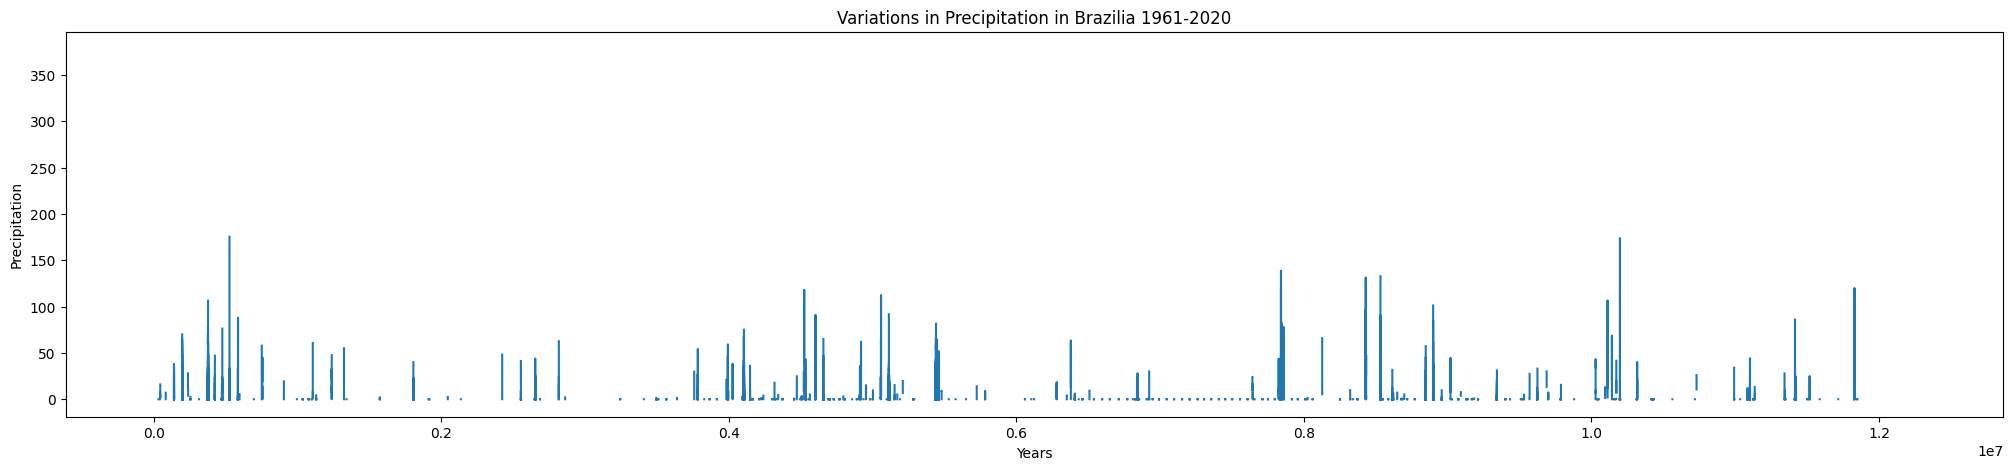

In [37]:
# Plotting the variation in precipitation in Brazil between the years 1961 to 2019
#
plt.figure(figsize = (25,5));
plt.plot(data.Precipitation);
plt.ylabel('Precipitation');
plt.xlabel('Years')
plt.title('Variations in Precipitation in Brazilia 1961-2020');

From the graph there is varience in the precipitaion level in brazil from 1961 to 2019. There is a certain rise and fall of the level.

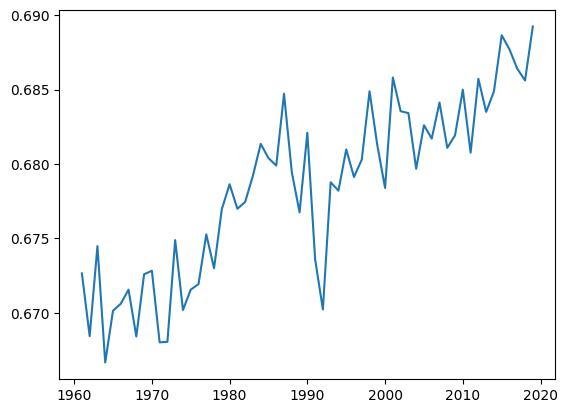

In [38]:
# Plotting the yearly maximum temperature and the year

df.index = pd.to_datetime(df['Date'])
average_monthly_temperature = df['Maximum_Temperature'].groupby(df.index.year).mean()

x = np.arange(1961, 2020)

l = average_monthly_temperature.tolist()

average_monthly_temperature
plt.plot(x, l, label="line L")

The above graph shows us the variance of maximum temperature to that of the year and we can see the there is a hugh rise in temperature in 2020 and there is downfall in between 1990 to 2000.

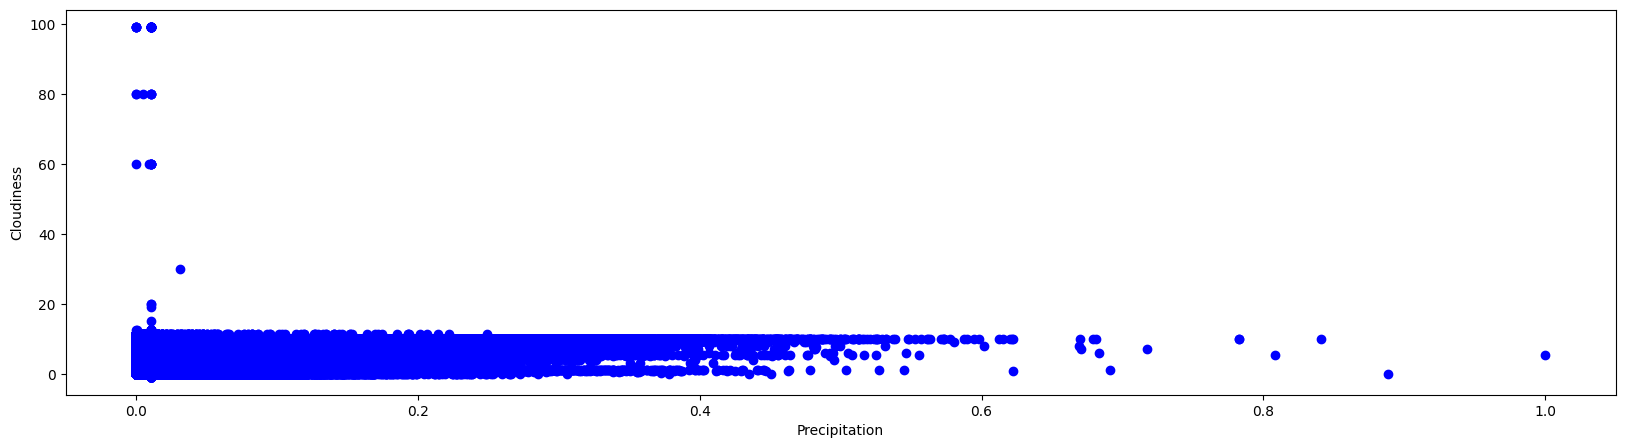

In [39]:
# Drawing a scatterplot between precipitation and cloudiness

col1 = df['Precipitation']
col2 = df['Cloudiness']

plt.figure(figsize = (20, 5))
plt.scatter(col1, col2,color="blue",)
plt.xlabel('Precipitation')
plt.ylabel('Cloudiness')
plt.show()

The above graph shows us how precipitaion is affected by cloudiness 

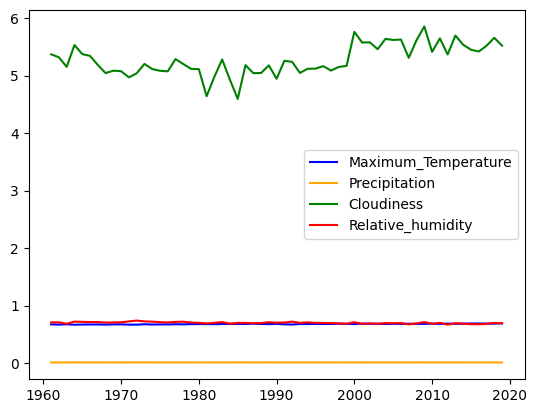

In [40]:
# Plotting the relationship between cloudiness,temperature,precipitation and relative humidity

average_monthly_temperature = df['Maximum_Temperature'].groupby(df.index.year).mean()
average_monthly_precipitation = df['Precipitation'].groupby(df.index.year).mean()
average_monthly_cloud = df['Cloudiness'].groupby(df.index.year).mean()
average_monthly_humidity = df['Relative_humidity'].groupby(df.index.year).mean()

a = average_monthly_temperature.tolist()
b = average_monthly_precipitation.tolist()
c = average_monthly_cloud.tolist()
d = average_monthly_humidity.tolist()

plt.plot(x, a, label="Maximum_Temperature",color="blue")
plt.plot(x, b, label="Precipitation",color="orange")
plt.plot(x, c, label="Cloudiness",color="green")
plt.plot(x, d, label="Relative_humidity",color="red")
plt.legend()

The above graph describes that precipitation, maximum temperature and relative humidity is almost constant but the cloudiness varies so much throughout

<AxesSubplot: >

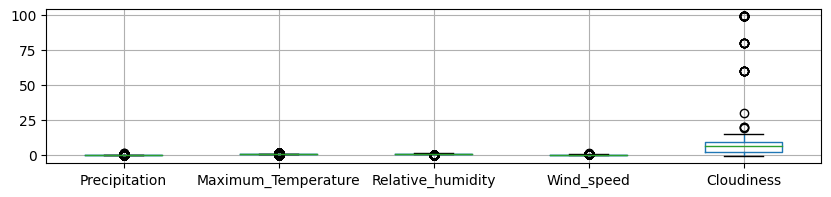

In [41]:
# Boxplot 

df.boxplot(column=['Precipitation','Maximum_Temperature','Relative_humidity','Wind_speed','Cloudiness'],figsize=(10,2))


The box plot shows the distribution of the attributes it is being compared with one another.

<AxesSubplot: >

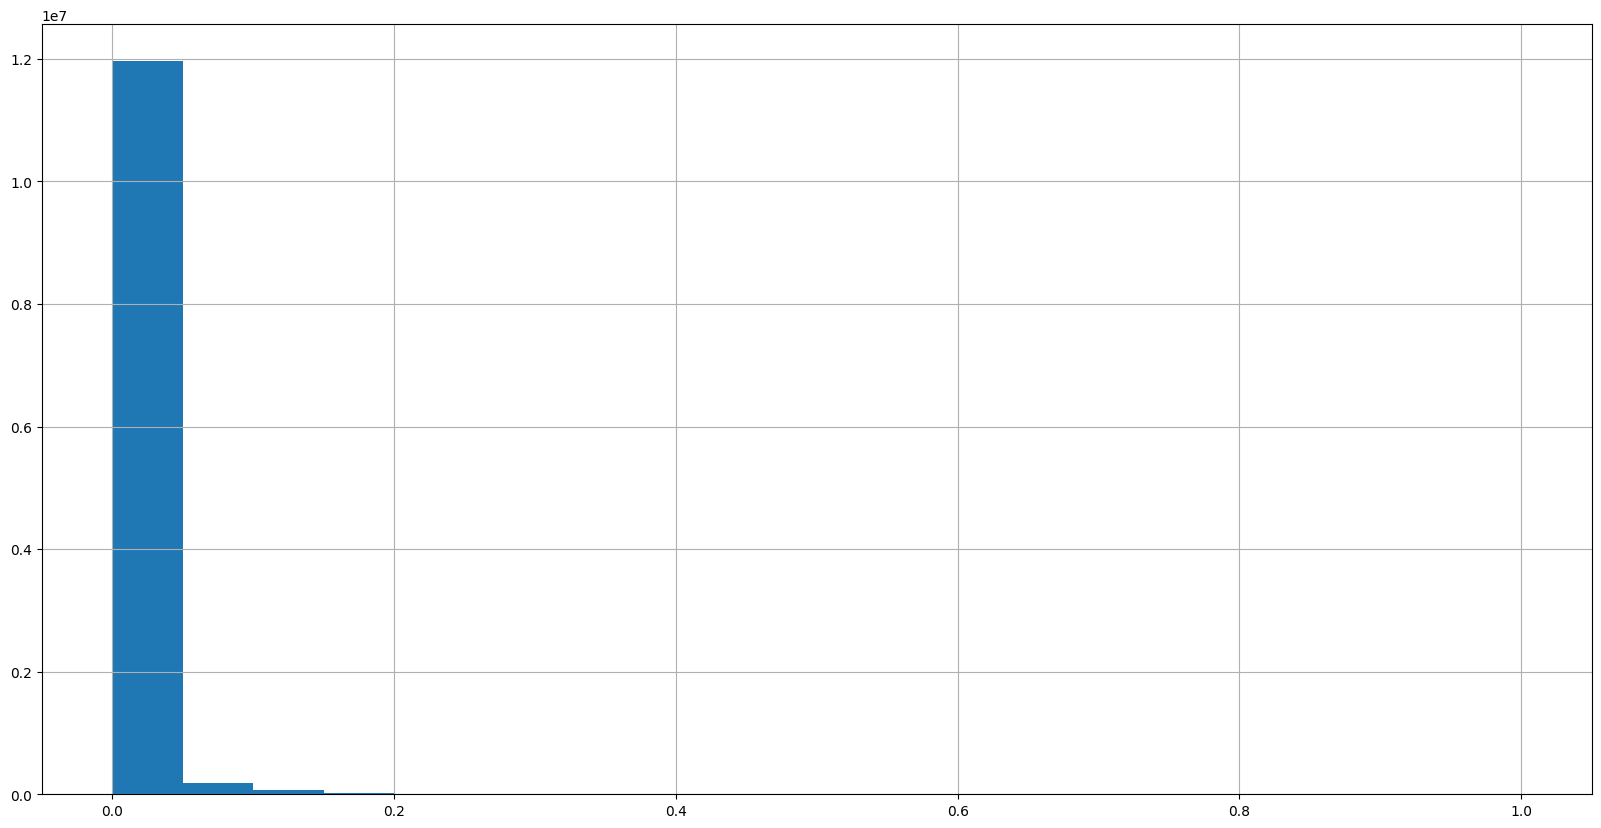

In [42]:
# Plotting the histogram for the precipitation

df['Precipitation'].hist(bins=20,figsize=(20,10))

The graph displays the continues values which explains the rise and then fall of precipitation

<AxesSubplot: >

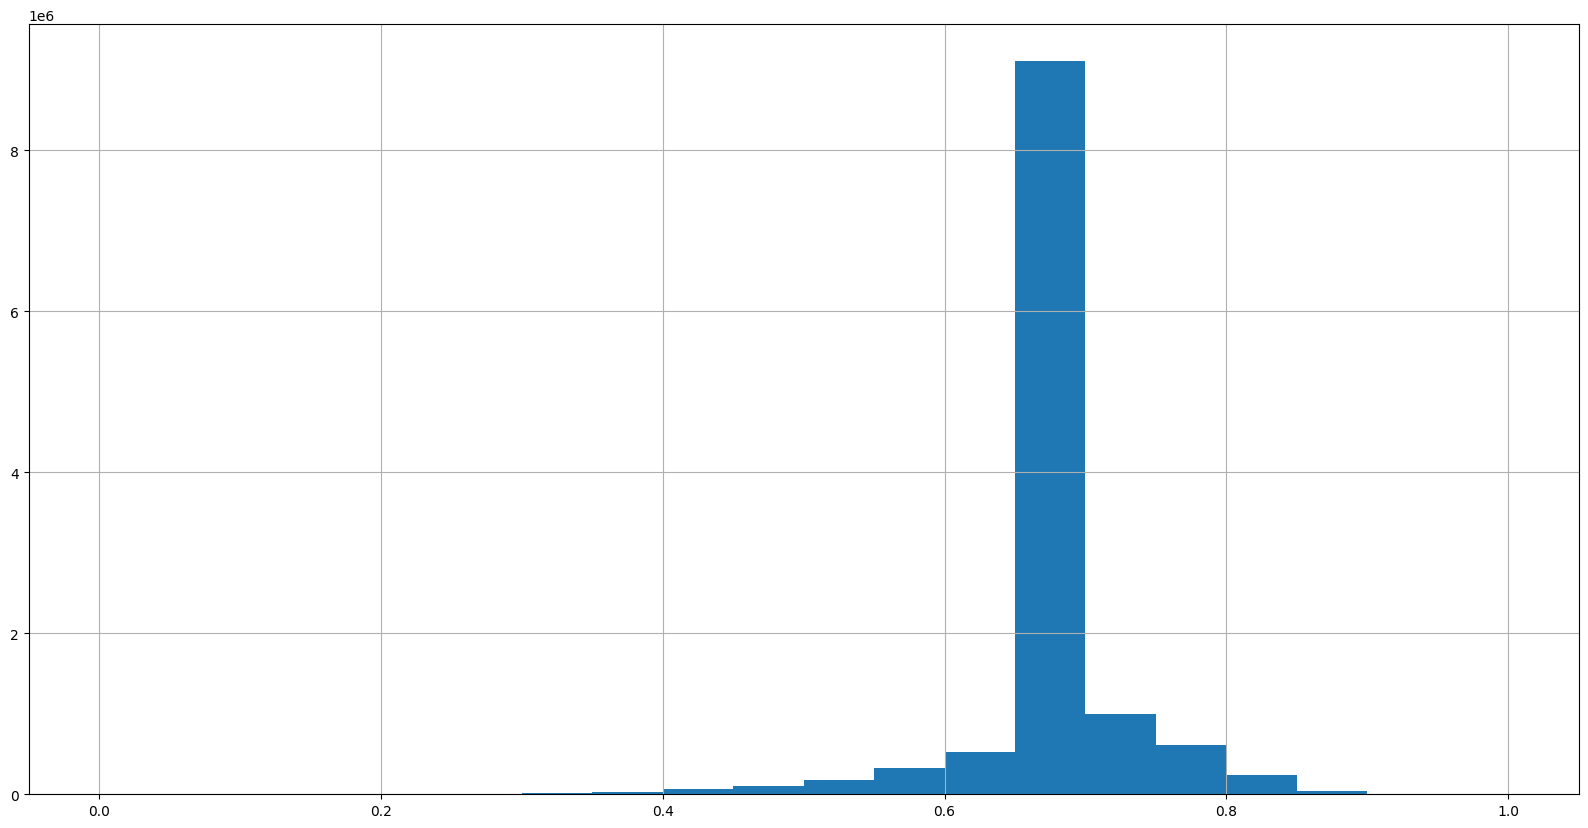

In [43]:
# Plotting the histogram for the maximum temperature

df['Maximum_Temperature'].hist(bins=20,figsize=(20,10))

The above graph shows the continues values from low to a certain rise and going low of the attibute Maximum_temperature

In [44]:
# Create twodimensional NumPy arrays from onedimensional Pandas series for the feature and target variables

X = df[['Precipitation','Maximum_Temperature','Relative_humidity','Wind_speed','Cloudiness']].values
y = df['Year'].values
print(X)
print(y)


[[ 0.01065883  0.73447537  0.69796141  0.08104219  5.30951457]
 [ 0.01065883  0.67934109  0.29347826  0.04135875  5.        ]
 [ 0.01065883  0.67934109  0.48913043  0.0827175   4.        ]
 ...
 [ 0.01065883  0.67934109  0.47826087  0.08510638 10.        ]
 [ 0.01065883  0.67934109  0.92391304  0.04255319 10.        ]
 [ 0.01065883  0.67934109  0.38043478  0.          8.75      ]]
[1961 1961 1961 ... 2019 2019 2019]


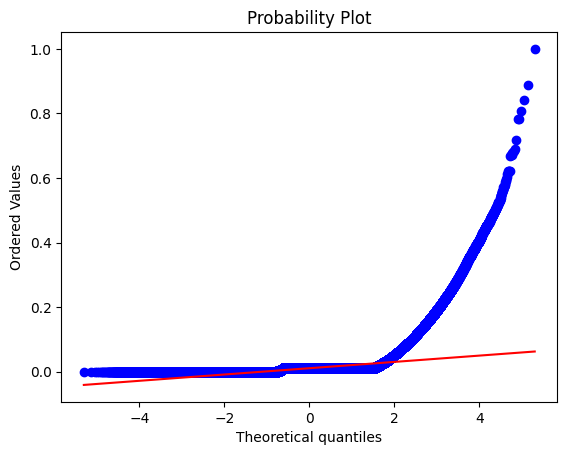

In [45]:
# Apply the 'norm.pdf()' function to get the probabilities and then create a normal distribution curve again for the train set errors

import scipy.stats as stats
import pylab    

stats.probplot(df['Precipitation'], dist="norm", plot=pylab)
pylab.show()

This graph displays the probabilities of theoretical quantiles to that of oredered values. Here percipitaion is having a rise in (2,1.0)

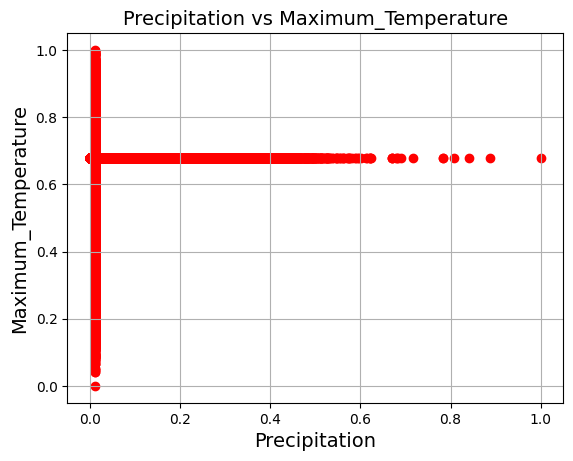

In [46]:
# Create a scatter plot between the errors and the independent variable for the train set.

plt.scatter(df['Precipitation'], df['Maximum_Temperature'], color = 'red')
plt.title('Precipitation vs Maximum_Temperature', fontsize = 14)
plt.xlabel('Precipitation', fontsize = 14)
plt.ylabel('Maximum_Temperature', fontsize = 14)
plt.grid(True)
plt.show()

The graph between Maximum_temperature to that of percipitation.Here the graph displays how much Temperature is affected with percipitation

<AxesSubplot: xlabel='Date'>

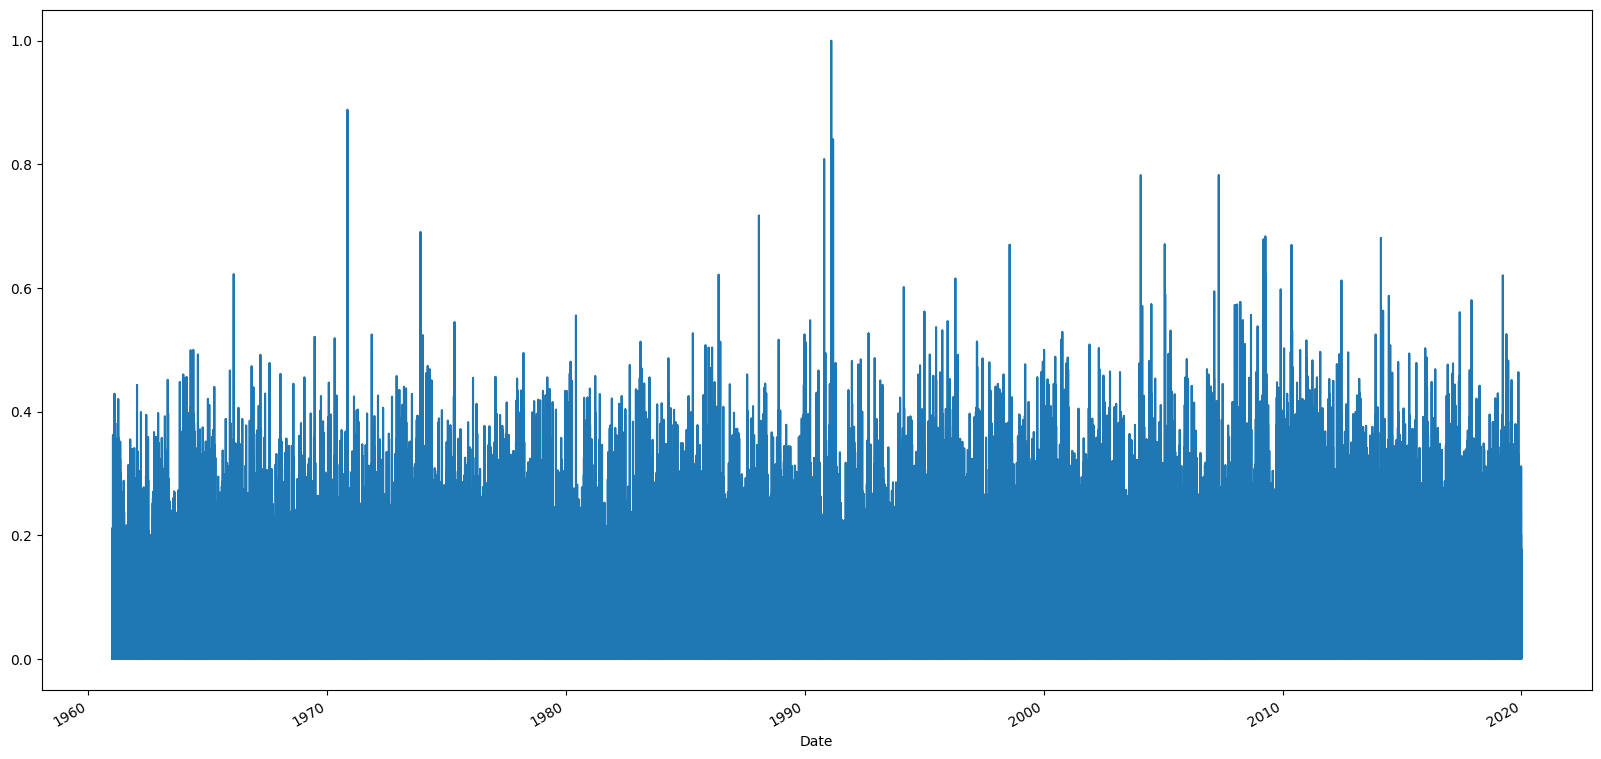

In [47]:
#Time-Series Line Plots

df['Precipitation'].plot(figsize=(20,10))


This graph is a time graph it tells us that during 1990 the percipitation is the highest recorded according to the data.It is a very much scattered garph

<AxesSubplot: xlabel='Date'>

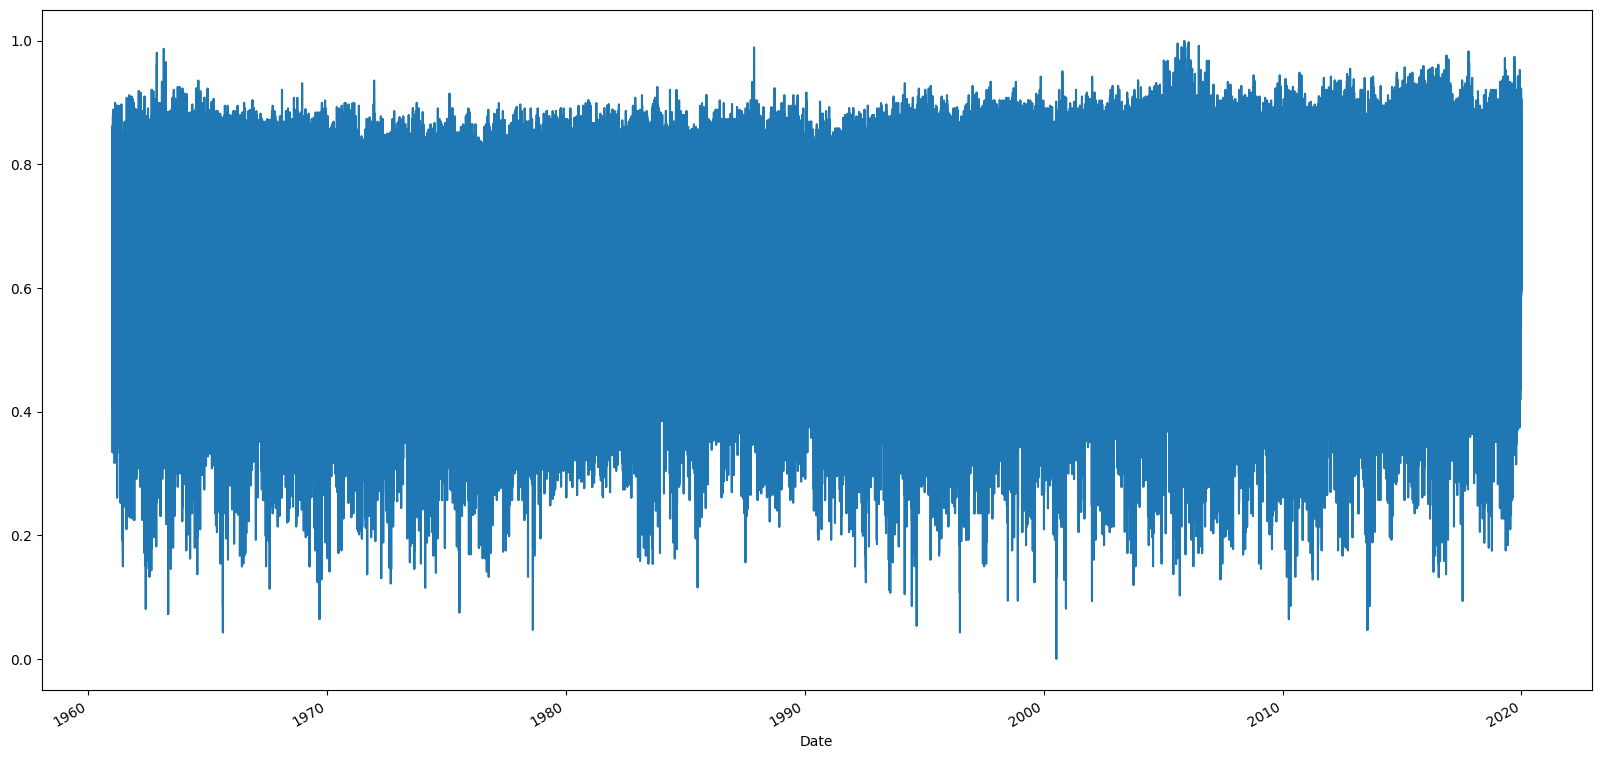

In [48]:
# Time-Series Line Plots

df['Maximum_Temperature'].plot(figsize=(20,10))

This graph is a time graph it tells us that during 2000 the Maximum_Temperature is the least recorded according to the data.It is a scattered graph

<AxesSubplot: xlabel='Month'>

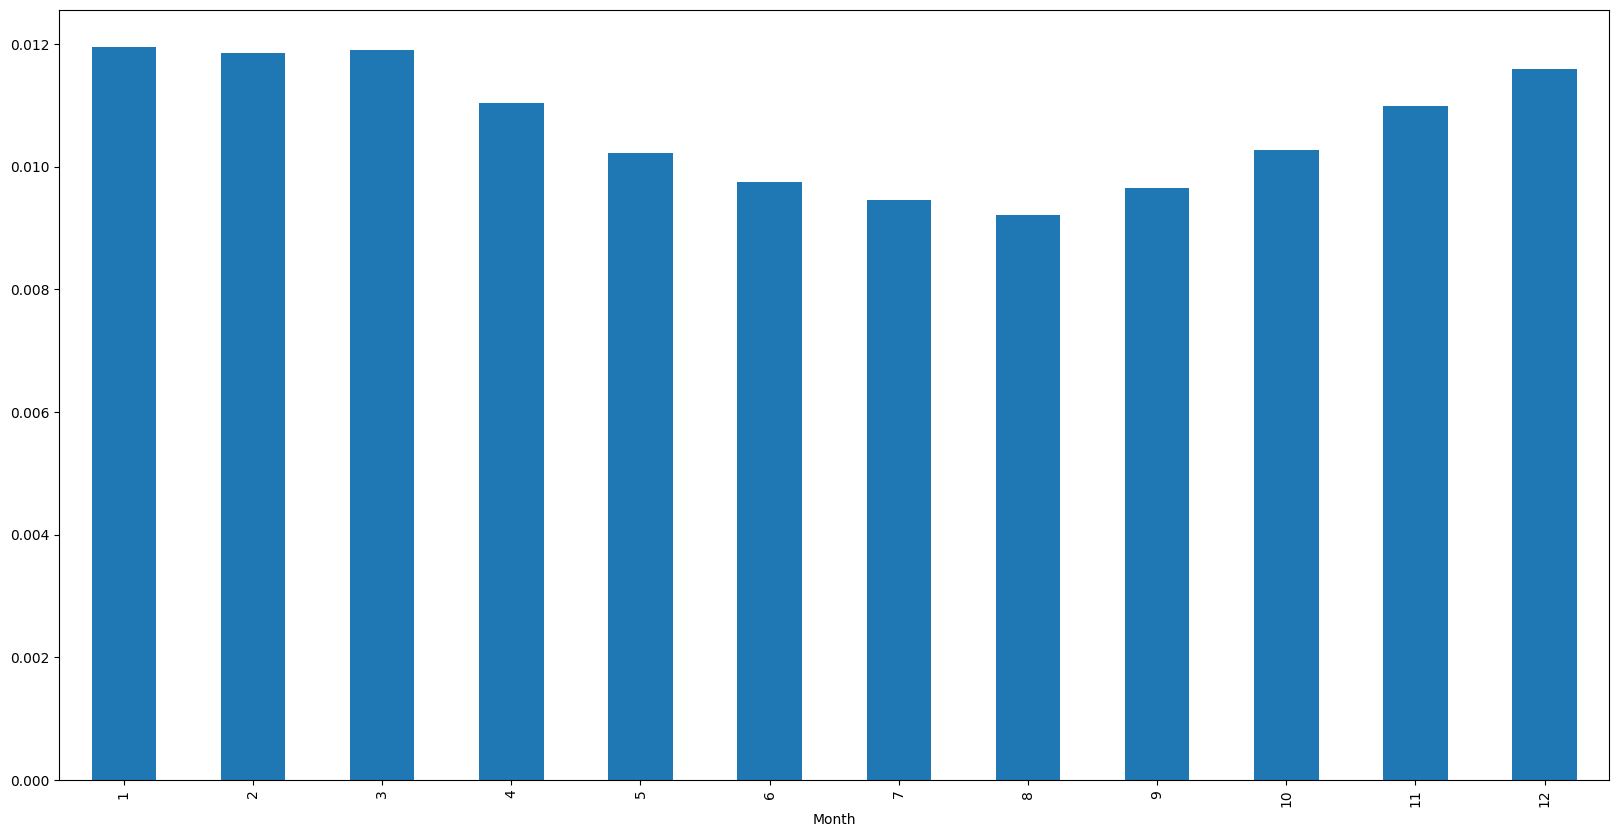

In [49]:
# Bivariate Bar Plots

df.groupby('Month')['Precipitation'].mean().plot(kind='bar',figsize=(20,10))

The graph showing is bar graph and it tells us that in 3rd month the recorded precipitation is the highest.

<AxesSubplot: xlabel='Month'>

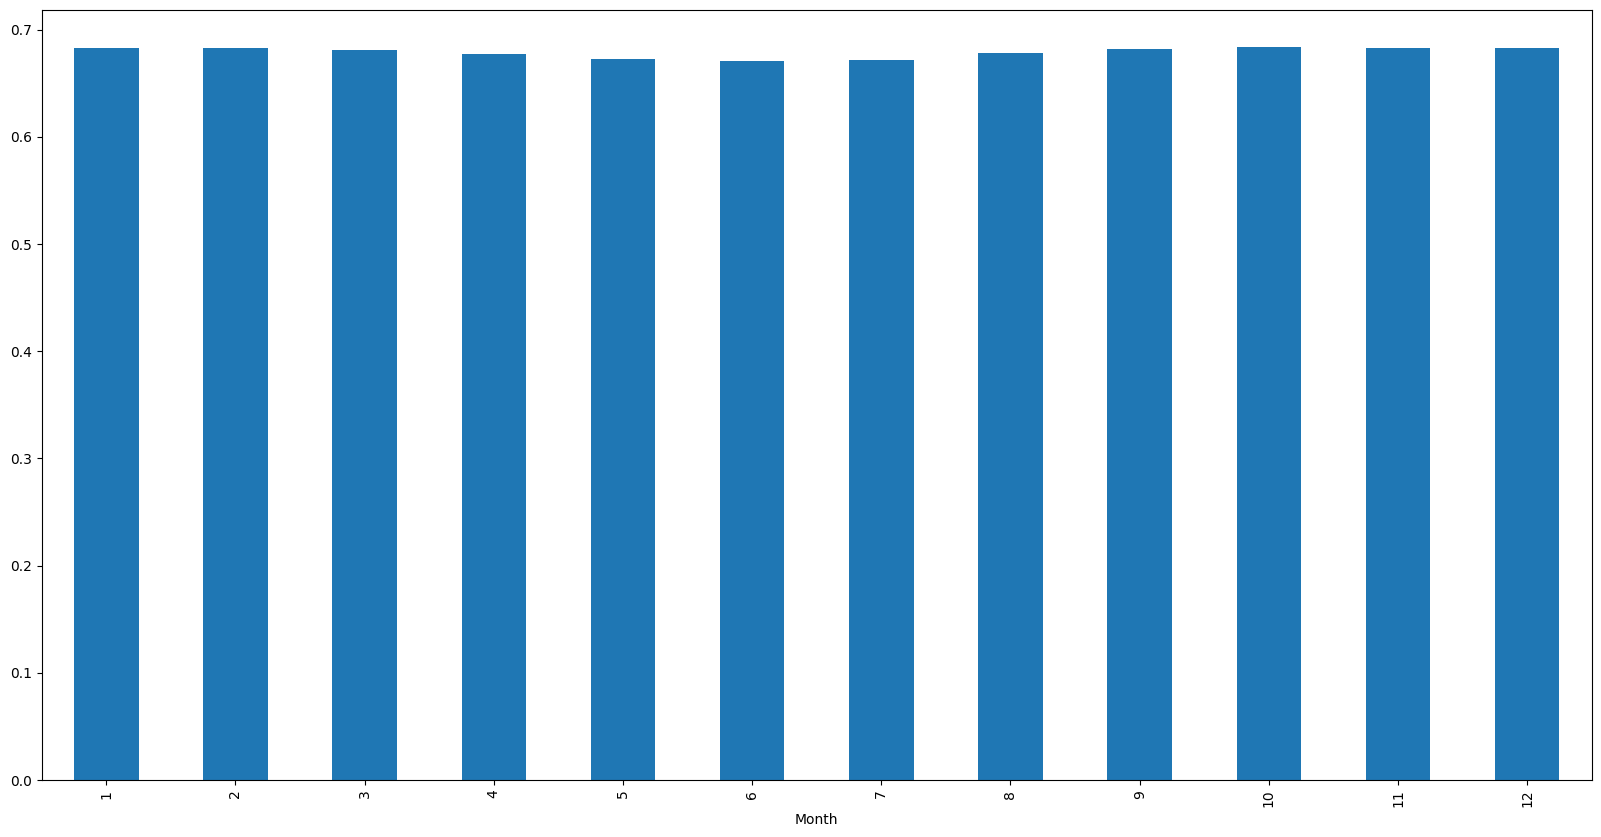

In [50]:
# Bivariate Bar Plots

df.groupby('Month')['Maximum_Temperature'].mean().plot(kind='bar',figsize=(20,10))

The graph showing is bar graph and it tells us that in 12th month the recorded Maximum_Temperature is the highest.

<AxesSubplot: >

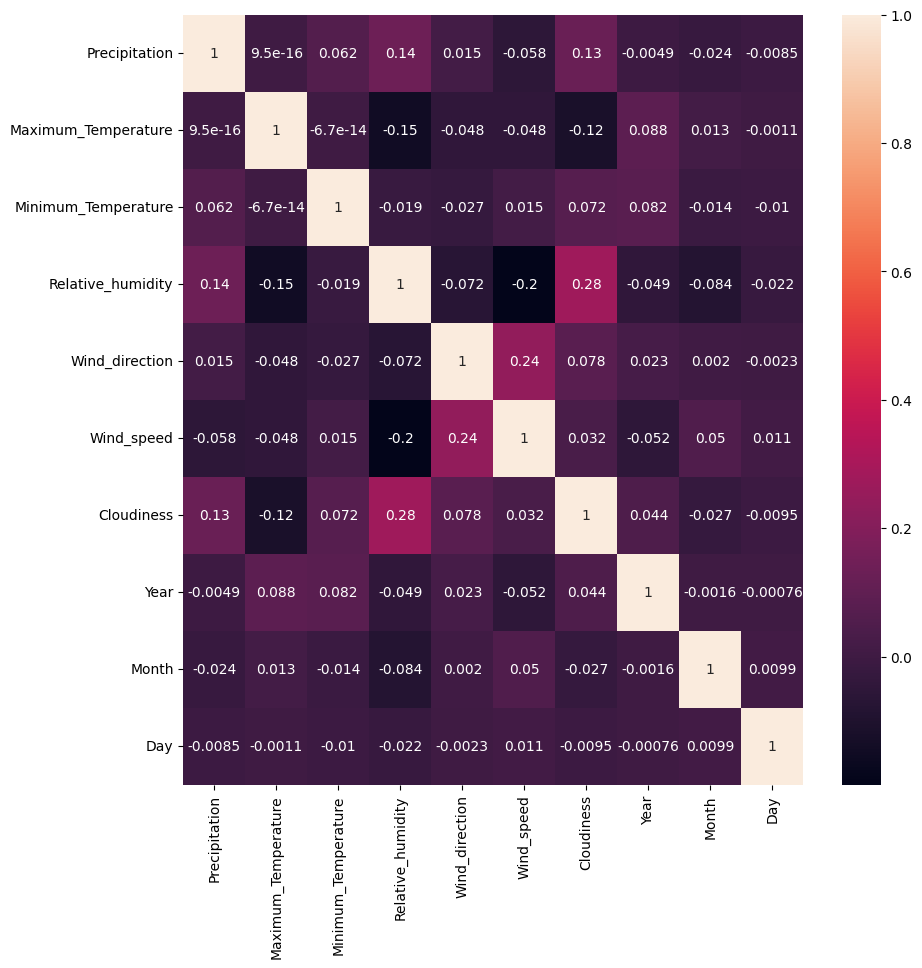

In [51]:
# Correlation
import seaborn as sns
df.corr()

# Heatmap

plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),annot=True)